In [2]:
# Brain Contour Masking
# Import Libraries
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import SimpleITK as sitk
import torchvision.transforms as transforms
import torch

# Load Patient (010) .mha file
patient_072_adc = "/Users/ananyashukla/Desktop/Brown@Research/lesion_segmentation/data_dir/BONBID2023_Train/1ADC_ss/MGHNICU_070-VISIT_01-ADC_ss.mha"
patient_275_adc = "/Users/ananyashukla/Desktop/Brown@Research/lesion_segmentation/data_dir/BONBID2023_Train/1ADC_ss/MGHNICU_105-VISIT_01-ADC_ss.mha"
patient_440_adc = "/Users/ananyashukla/Desktop/Brown@Research/lesion_segmentation/data_dir/BONBID2023_Train/1ADC_ss/MGHNICU_440-VISIT_01-ADC_ss.mha"
patient_010_adc = "/Users/ananyashukla/Desktop/Brown@Research/lesion_segmentation/data_dir/BONBID2023_Train/1ADC_ss/MGHNICU_010-VISIT_01-ADC_ss.mha"

patient_072_zadc = "/Users/ananyashukla/Desktop/Brown@Research/lesion_segmentation/data_dir/BONBID2023_Train/2Z_ADC/Zmap_MGHNICU_070-VISIT_01-ADC_smooth2mm_clipped10.mha"
patient_275_zadc = "/Users/ananyashukla/Desktop/Brown@Research/lesion_segmentation/data_dir/BONBID2023_Train/2Z_ADC/Zmap_MGHNICU_105-VISIT_01-ADC_smooth2mm_clipped10.mha"
patient_440_zadc = "/Users/ananyashukla/Desktop/Brown@Research/lesion_segmentation/data_dir/BONBID2023_Train/2Z_ADC/Zmap_MGHNICU_440-VISIT_01-ADC_smooth2mm_clipped10.mha"
patient_010_zadc = "/Users/ananyashukla/Desktop/Brown@Research/lesion_segmentation/data_dir/BONBID2023_Train/2Z_ADC/Zmap_MGHNICU_010-VISIT_01-ADC_smooth2mm_clipped10.mha"

patient_072_label = "/Users/ananyashukla/Desktop/Brown@Research/lesion_segmentation/data_dir/BONBID2023_Train/3LABEL/MGHNICU_070-VISIT_01_lesion.mha"
patient_275_label = "/Users/ananyashukla/Desktop/Brown@Research/lesion_segmentation/data_dir/BONBID2023_Train/3LABEL/MGHNICU_105-VISIT_01_lesion.mha"
patient_440_label = "/Users/ananyashukla/Desktop/Brown@Research/lesion_segmentation/data_dir/BONBID2023_Train/3LABEL/MGHNICU_440-VISIT_01_lesion.mha"
patient_010_label = "/Users/ananyashukla/Desktop/Brown@Research/lesion_segmentation/data_dir/BONBID2023_Train/3LABEL/MGHNICU_010-VISIT_01_lesion.mha"

# Loading and Reading Images by SimpleITK
image_adc_72, image_adc_275, image_adc_440, image_adc_010 = sitk.ReadImage(patient_072_adc), sitk.ReadImage(patient_275_adc), sitk.ReadImage(patient_440_adc), sitk.ReadImage(patient_010_adc)
image_zadc_72, image_zadc_275, image_zadc_440, image_zadc_010 = sitk.ReadImage(patient_072_zadc), sitk.ReadImage(patient_275_zadc), sitk.ReadImage(patient_440_zadc), sitk.ReadImage(patient_010_zadc)
image_label_72, image_label_275, image_label_440, image_label_010 = sitk.ReadImage(patient_072_label), sitk.ReadImage(patient_275_label), sitk.ReadImage(patient_440_label), sitk.ReadImage(patient_010_label)

image_array_adc_72, image_array_adc_275, image_array_adc_440, image_array_adc_010 = sitk.GetArrayFromImage(image_adc_72), sitk.GetArrayFromImage(image_adc_275), sitk.GetArrayFromImage(image_adc_440), sitk.GetArrayFromImage(image_adc_010)
image_array_zadc_72, image_array_zadc_275, image_array_zadc_440, image_array_zadc_010 = sitk.GetArrayFromImage(image_zadc_72), sitk.GetArrayFromImage(image_zadc_275), sitk.GetArrayFromImage(image_zadc_440), sitk.GetArrayFromImage(image_zadc_010)
image_array_label_72, image_array_label_275, image_array_label_440, image_array_label_010 = sitk.GetArrayFromImage(image_label_72), sitk.GetArrayFromImage(image_label_275), sitk.GetArrayFromImage(image_label_440), sitk.GetArrayFromImage(image_label_010)

Background Removal (Clipping)

Patient 72 ADC Shape: (48, 256, 256)
Patient 275 ADC Shape: (48, 256, 256)
Patient 440 ADC Shape: (20, 160, 160)


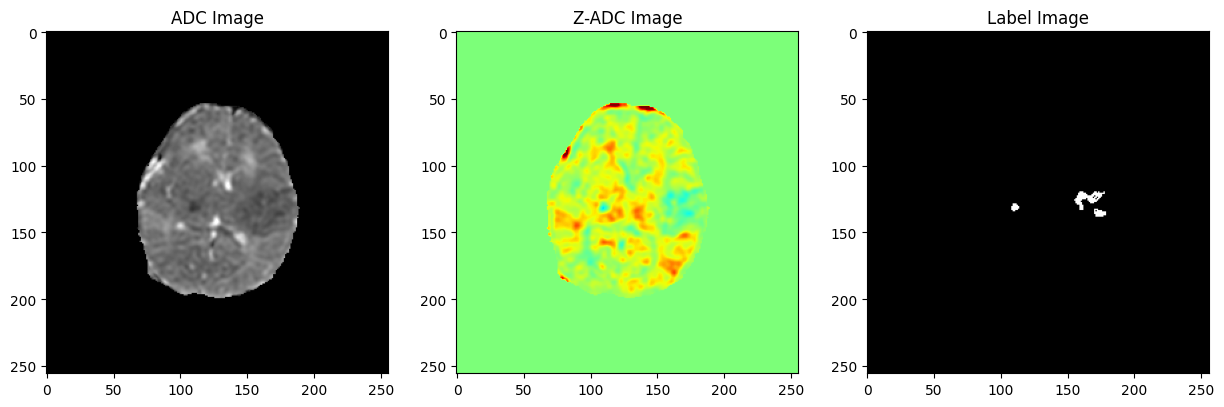

In [3]:
print(f'Patient 72 ADC Shape: {image_array_adc_72.shape}')
print(f'Patient 275 ADC Shape: {image_array_adc_275.shape}')
print(f'Patient 440 ADC Shape: {image_array_adc_440.shape}')

slice_adc = image_array_adc_72[image_array_adc_72.shape[0] // 2, :, :]
slice_zadc = image_array_zadc_72[image_array_zadc_72.shape[0] // 2, :, :]
slice_label = image_array_label_72[(image_array_label_72.shape[0] // 2), :, :]

# Displaying Images using Matplotlib
plt.figure(figsize = (15, 15))
plt.subplot(131)
# Reference: https://radiopaedia.org/blog/why-routine-measurement-of-adc-values-is-important
plt.imshow(slice_adc, cmap = 'gray', vmin = 0, vmax = 3400) # vmax = 3400
plt.title('ADC Image')
plt.subplot(132)
# Reference: https://www.biorxiv.org/content/10.1101/2023.06.30.546841v1.full
plt.imshow(slice_zadc, cmap = 'jet', vmin = -10, vmax = 10)
plt.title('Z-ADC Image')
plt.subplot(133)
plt.imshow(slice_label, cmap = 'gray', vmin = 0, vmax = 1)
plt.title('Label Image')
plt.show()

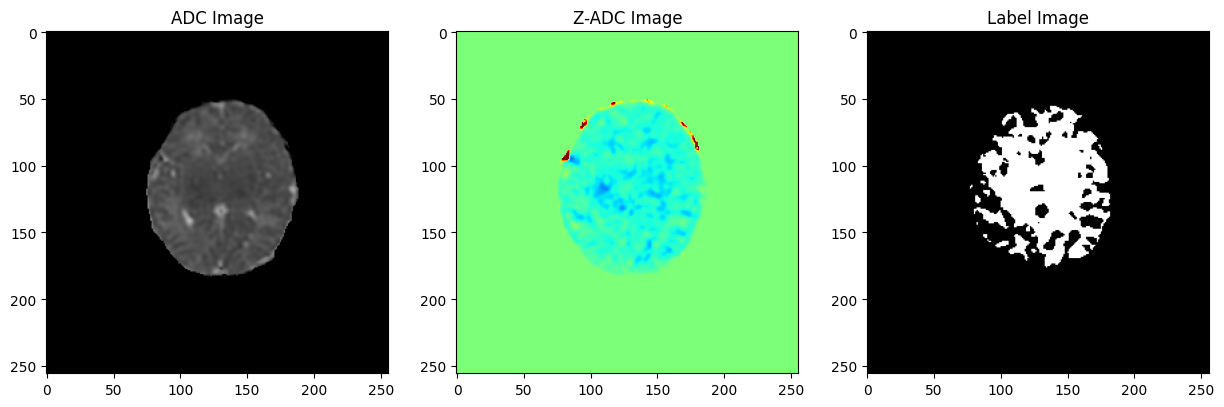

In [4]:
slice_adc = image_array_adc_275[image_array_adc_275.shape[0] // 2, :, :]
slice_zadc = image_array_zadc_275[image_array_zadc_275.shape[0] // 2, :, :]
slice_label = image_array_label_275[(image_array_label_275.shape[0] // 2), :, :]

# Displaying Images using Matplotlib
plt.figure(figsize = (15, 15))
plt.subplot(131)
# Reference: https://radiopaedia.org/blog/why-routine-measurement-of-adc-values-is-important
plt.imshow(slice_adc, cmap = 'gray', vmin = 0, vmax = 3400) # vmax = 3400
plt.title('ADC Image')
plt.subplot(132)
# Reference: https://www.biorxiv.org/content/10.1101/2023.06.30.546841v1.full
plt.imshow(slice_zadc, cmap = 'jet', vmin = -10, vmax = 10)
plt.title('Z-ADC Image')
plt.subplot(133)
plt.imshow(slice_label, cmap = 'gray', vmin = 0, vmax = 1)
plt.title('Label Image')
plt.show()

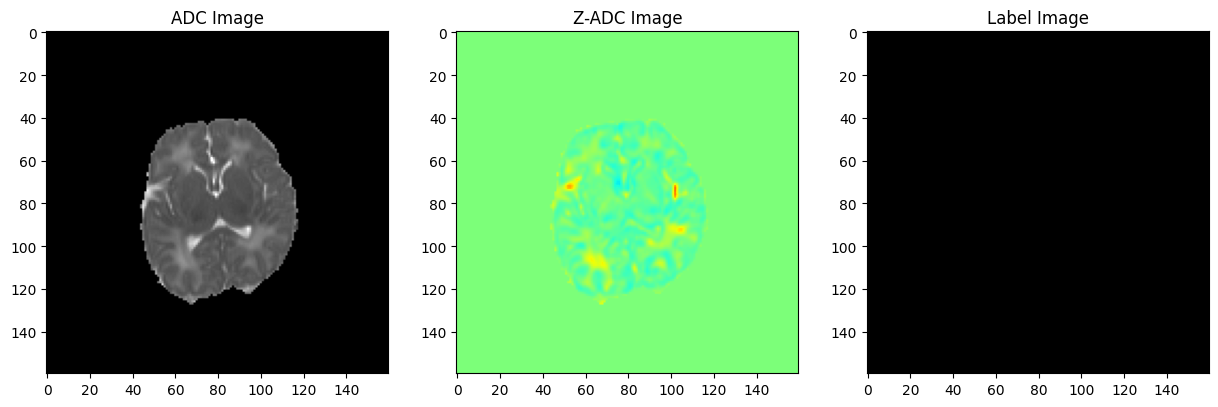

In [5]:
slice_adc = image_array_adc_440[image_array_adc_440.shape[0] // 2, :, :]
slice_zadc = image_array_zadc_440[image_array_zadc_440.shape[0] // 2, :, :]
slice_label = image_array_label_440[(image_array_label_440.shape[0] // 2), :, :]

# Displaying Images using Matplotlib
plt.figure(figsize = (15, 15))
plt.subplot(131)
# Reference: https://radiopaedia.org/blog/why-routine-measurement-of-adc-values-is-important
plt.imshow(slice_adc, cmap = 'gray', vmin = 0, vmax = 3400) # vmax = 3400
plt.title('ADC Image')
plt.subplot(132)
# Reference: https://www.biorxiv.org/content/10.1101/2023.06.30.546841v1.full
plt.imshow(slice_zadc, cmap = 'jet', vmin = -10, vmax = 10)
plt.title('Z-ADC Image')
plt.subplot(133)
plt.imshow(slice_label, cmap = 'gray', vmin = 0, vmax = 1)
plt.title('Label Image')
plt.show()

In [6]:
# Looking into the Array Values (ADC)
print("Patient 72")
print(image_array_adc_72.shape, end='\n\n')

# Looking into the Array Values (ADC)
print(f'Mimimum ADC Value: {image_array_adc_72.min()}')
print(f'Maximum ADC Value: {image_array_adc_72.max()}', end='\n\n')

# Looking into the Array Values (Z-ADC)
print(f'Mimimum Z-ADC Value: {image_array_zadc_72.min()}')
print(f'Maximum Z-ADC Value: {image_array_zadc_72.max()}', end='\n\n')

# Number of Pixels with Negative ADC Values
print(f'Number of Pixels with Negative ADC Values: {np.sum(image_array_adc_72 < 0)}', end='\n\n')

# Number of Pixels with Negative ADC Values per Slice
for i in range(image_array_adc_72.shape[0]):
    print(f'Number of Pixels with Negative ADC Values in Slice {i}: {np.sum(image_array_adc_72[i, :, :] < 0)}')

Patient 72
(48, 256, 256)

Mimimum ADC Value: -1102.4000244140625
Maximum ADC Value: 4528.0

Mimimum Z-ADC Value: -5.110559940338135
Maximum Z-ADC Value: 10.0

Number of Pixels with Negative ADC Values: 614

Number of Pixels with Negative ADC Values in Slice 0: 0
Number of Pixels with Negative ADC Values in Slice 1: 0
Number of Pixels with Negative ADC Values in Slice 2: 0
Number of Pixels with Negative ADC Values in Slice 3: 0
Number of Pixels with Negative ADC Values in Slice 4: 0
Number of Pixels with Negative ADC Values in Slice 5: 0
Number of Pixels with Negative ADC Values in Slice 6: 0
Number of Pixels with Negative ADC Values in Slice 7: 0
Number of Pixels with Negative ADC Values in Slice 8: 3
Number of Pixels with Negative ADC Values in Slice 9: 95
Number of Pixels with Negative ADC Values in Slice 10: 93
Number of Pixels with Negative ADC Values in Slice 11: 96
Number of Pixels with Negative ADC Values in Slice 12: 62
Number of Pixels with Negative ADC Values in Slice 13: 77

In [7]:
# Minimum and Maximum ADC Value (1ADC_ss)
def get_min_max_adc_values(directory):
    min_adc_value = float('inf')
    max_adc_value = float('-inf')
    
    for filename in os.listdir(directory):
        if filename.endswith('.mha'):
            file_path = os.path.join(directory, filename)
            image = sitk.ReadImage(file_path)
            image_array = sitk.GetArrayFromImage(image)
            
            current_min = image_array.min()
            current_max = image_array.max()
            
            if current_min < min_adc_value:
                min_adc_value = current_min
            if current_max > max_adc_value:
                max_adc_value = current_max
    
    return min_adc_value, max_adc_value

directory = 'data_dir/BONBID2023_Train/1ADC_ss'
min_adc_value, max_adc_value = get_min_max_adc_values(directory)

print("Across all Patients:")
print(f"Minimum ADC Value: {min_adc_value}")
print(f"Maximum ADC Value: {max_adc_value}")

Across all Patients:
Minimum ADC Value: -4528.0
Maximum ADC Value: 5148.0


In [8]:
# Number of Unique Pixels in all ADC Maps (1ADC_ss) with ADC Values as Negative
print("Total Number of Unique Pixels with Negative ADC Values in all ADC Maps (1ADC_ss):", end='\n\n')
dir = 'data_dir/BONBID2023_Train/1ADC_ss'
count = 0

def get_min_pixels(directory):
    for filename in os.listdir(directory):
        if filename.endswith('.mha'):
            file_path = os.path.join(directory, filename)
            image = sitk.ReadImage(file_path)
            image_array = sitk.GetArrayFromImage(image)

            # Number of Negative Pixels in the Image
            neg = np.sum(image_array < 0)
            # Update Global Count
            print(f"Number of Negative Pixels in {filename}: {neg}")

            global count
            count += neg

    return count

neg_count = get_min_pixels(dir)
print(f"Total Number of Negative Pixels: {neg_count}")

Total Number of Unique Pixels with Negative ADC Values in all ADC Maps (1ADC_ss):

Number of Negative Pixels in MGHNICU_455-VISIT_01-ADC_ss.mha: 0
Number of Negative Pixels in MGHNICU_336-VISIT_01-ADC_ss.mha: 0
Number of Negative Pixels in MGHNICU_209-VISIT_01-ADC_ss.mha: 0
Number of Negative Pixels in MGHNICU_014-VISIT_01-ADC_ss.mha: 11
Number of Negative Pixels in MGHNICU_454-VISIT_01-ADC_ss.mha: 0
Number of Negative Pixels in MGHNICU_405-VISIT_01-ADC_ss.mha: 2
Number of Negative Pixels in MGHNICU_015-VISIT_01-ADC_ss.mha: 60
Number of Negative Pixels in MGHNICU_457-VISIT_01-ADC_ss.mha: 0
Number of Negative Pixels in MGHNICU_178-VISIT_01-ADC_ss.mha: 445
Number of Negative Pixels in MGHNICU_456-VISIT_01-ADC_ss.mha: 0
Number of Negative Pixels in MGHNICU_449-VISIT_01-ADC_ss.mha: 0
Number of Negative Pixels in MGHNICU_215-VISIT_01-ADC_ss.mha: 0
Number of Negative Pixels in MGHNICU_362-VISIT_01-ADC_ss.mha: 0
Number of Negative Pixels in MGHNICU_448-VISIT_01-ADC_ss.mha: 0
Number of Negativ

In [9]:
# Slice with Maximum Number of Negative Pixels in all ADC Maps (1ADC_ss)
print("Slice with Maximum Number of Negative Pixels in all ADC Maps (1ADC_ss):", end='\n\n')
def per_patient_slice_with_max_neg(directory):
    for filename in os.listdir(directory):
        if filename.endswith('.mha'):
            file_path = os.path.join(directory, filename)
            image = sitk.ReadImage(file_path)
            image_array = sitk.GetArrayFromImage(image)
            max_neg = 0
            slice_index = 0
            for i in range(image_array.shape[0]):
                slice = image_array[i, :, :]
                neg = np.sum(slice < 0)
                if neg > max_neg:
                    max_neg = neg
                    slice_index = i

            print(f"Maximum Number of Negative Pixels in {filename} at Slice {slice_index}: {max_neg}")

per_patient_slice_with_max_neg(dir)



Slice with Maximum Number of Negative Pixels in all ADC Maps (1ADC_ss):

Maximum Number of Negative Pixels in MGHNICU_455-VISIT_01-ADC_ss.mha at Slice 0: 0
Maximum Number of Negative Pixels in MGHNICU_336-VISIT_01-ADC_ss.mha at Slice 0: 0
Maximum Number of Negative Pixels in MGHNICU_209-VISIT_01-ADC_ss.mha at Slice 0: 0
Maximum Number of Negative Pixels in MGHNICU_014-VISIT_01-ADC_ss.mha at Slice 10: 4
Maximum Number of Negative Pixels in MGHNICU_454-VISIT_01-ADC_ss.mha at Slice 0: 0
Maximum Number of Negative Pixels in MGHNICU_405-VISIT_01-ADC_ss.mha at Slice 4: 1
Maximum Number of Negative Pixels in MGHNICU_015-VISIT_01-ADC_ss.mha at Slice 10: 16
Maximum Number of Negative Pixels in MGHNICU_457-VISIT_01-ADC_ss.mha at Slice 0: 0
Maximum Number of Negative Pixels in MGHNICU_178-VISIT_01-ADC_ss.mha at Slice 6: 85
Maximum Number of Negative Pixels in MGHNICU_456-VISIT_01-ADC_ss.mha at Slice 0: 0
Maximum Number of Negative Pixels in MGHNICU_449-VISIT_01-ADC_ss.mha at Slice 0: 0
Maximum Nu

ADC/ZADC Value Clipping

Text(0.5, 1.0, 'Label Image')

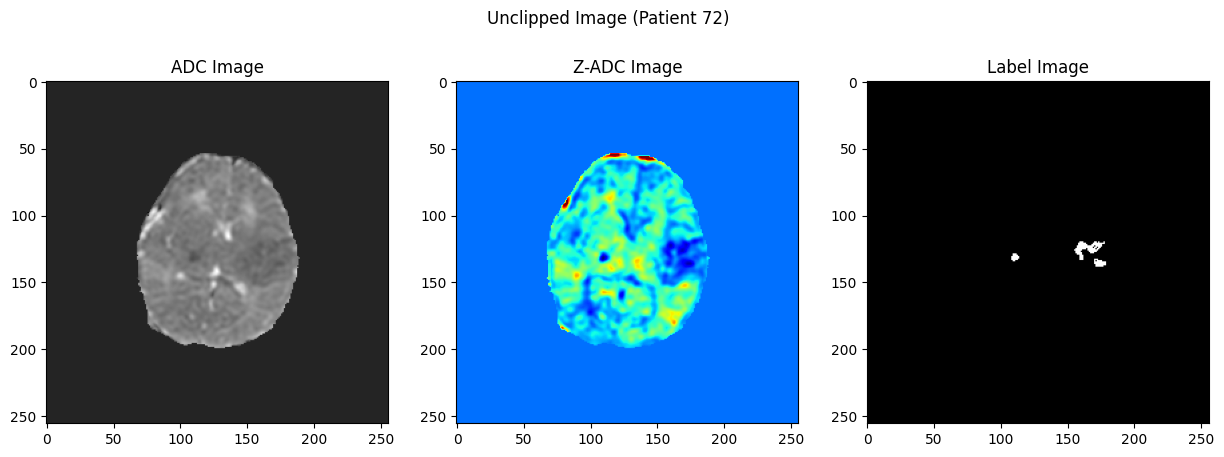

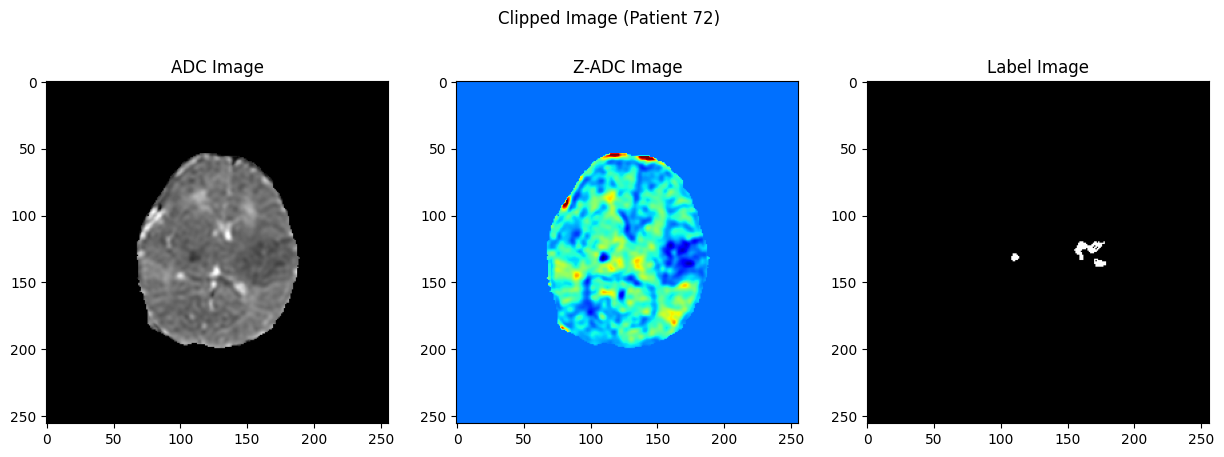

In [11]:
slice_adc = image_array_adc_72[image_array_adc_72.shape[0] // 2, :, :]
slice_zadc = image_array_zadc_72[image_array_zadc_72.shape[0] // 2, :, :]
slice_label = image_array_label_72[(image_array_label_72.shape[0] // 2), :, :]

# Displaying Unclipped Images using Matplotlib
plt.figure(figsize = (15, 5))
plt.suptitle('Unclipped Image (Patient 72)')
plt.subplot(131)
plt.imshow(slice_adc, cmap = 'gray')
plt.title('ADC Image')
plt.subplot(132)
plt.imshow(slice_zadc, cmap = 'jet')
plt.title('Z-ADC Image')
plt.subplot(133)
plt.imshow(slice_label, cmap = 'gray')
plt.title('Label Image')

slice_adc_cliped = np.clip(slice_adc, 0, 3400)
slice_zadc_cliped = np.clip(slice_zadc, -10, 10)
slice_label_cliped = np.clip(slice_label, 0, 1)

# Displaying Unclipped Images using Matplotlib
plt.figure(figsize = (15, 5))
plt.suptitle('Clipped Image (Patient 72)')
plt.subplot(131)
plt.imshow(slice_adc_cliped, cmap = 'gray')
plt.title('ADC Image')
plt.subplot(132)
plt.imshow(slice_zadc_cliped, cmap = 'jet')
plt.title('Z-ADC Image')
plt.subplot(133)
plt.imshow(slice_label_cliped, cmap='gray')
plt.title('Label Image')

In [12]:
'''
Function: 
clip_dir(directory) : Clipping ADC Images between [0, 3400] from dir(1ADC_ss)

Input: Directory (1ADC_ss) [.npy, .mha file type]
Output: Directory (1ADC_ss_clipped) [.npy, .mha file type] with Clipped ADC Images between [0, 3400]
'''

# Clipping Function
def clip_dir(in_directory, out_directory):
    if not os.path.exists(out_directory):
        os.makedirs(out_directory)

    for filename in os.listdir(directory):
        if filename.endswith('.npy'):
            file_path = os.path.join(directory, filename)
            image = np.load(file_path)
            image_clipped = np.clip(image, 0, 3400)
            np.save(f'data_dir/BONBID2023_Train/1ADC_ss_clipped/{filename}', image_clipped)

        elif filename.endswith('.mha'):
            file_path = os.path.join(directory, filename)
            image = sitk.ReadImage(file_path)
            image_array = sitk.GetArrayFromImage(image)
            image_clipped = np.clip(image_array, 0, 3400)
            image_clipped = sitk.GetImageFromArray(image_clipped)
            sitk.WriteImage(image_clipped, f'data_dir/BONBID2023_Train/1ADC_ss_clipped/{filename}')

# Clipping ADC Images
input_directory = 'data_dir/BONBID2023_Train/1ADC_ss'
output_directory = 'data_dir/BONBID2023_Train/1ADC_ss_clipped'
clip_dir(input_directory, output_directory)

Min-Max Normalisation

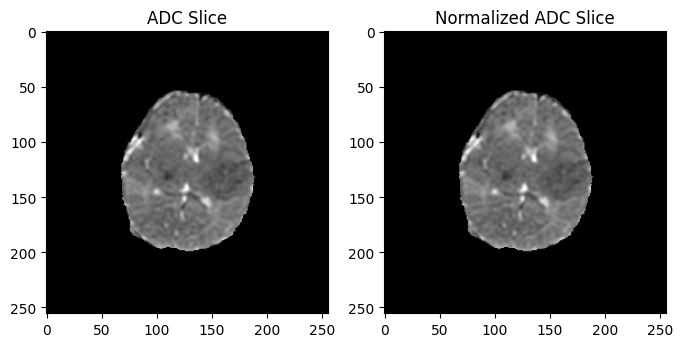

In [16]:
# 1. Min-Max Normalization
adc_min, adc_max = slice_adc_cliped.min(), slice_adc_cliped.max()

slice_adc_normalized = (slice_adc_cliped - adc_min) / (adc_max - adc_min)

# Plot Normalized Slices
fig, axes = plt.subplots(1, 2, figsize = (8, 8))
axes[0].imshow(slice_adc_cliped, cmap = 'gray')
axes[0].set_title('ADC Slice')
axes[1].imshow(slice_adc_normalized, cmap = 'gray')
axes[1].set_title('Normalized ADC Slice')
plt.show()

Z-Score Normalisation

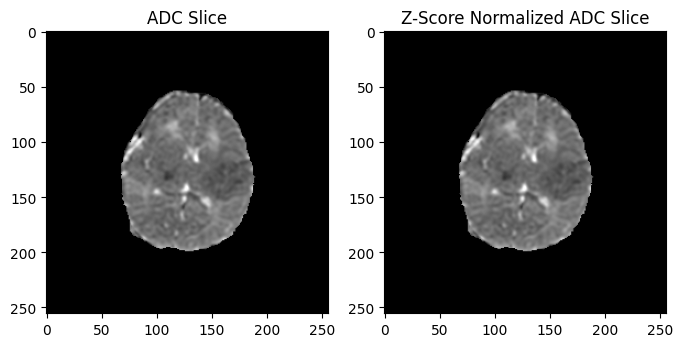

In [15]:
# 2. Z-Score Normalization
adc_mean, adc_std = slice_adc_cliped.mean(), slice_adc_cliped.std()

slice_adc_zscore = (slice_adc_cliped - adc_mean) / adc_std

# Plot Z-Score Normalized Slices
fig, axes = plt.subplots(1, 2, figsize=(8,8))
# Original ADC and ZADC slices
axes[0].imshow(slice_adc_cliped, cmap='gray')
axes[0].set_title('ADC Slice')
axes[1].imshow(slice_adc_zscore, cmap='gray')
axes[1].set_title('Z-Score Normalized ADC Slice')
plt.show()

In [17]:
'''
Min-Max Normalization Function
Input: Image
Output: Normalized Image between [0, 1]
'''

def min_max_normalization(image):
    min_val, max_val = image.min(), image.max()
    return (image - min_val) / (max_val - min_val)